# Perkenalan

Muhammad Bintang Ramadhan  
Data Science Batch 08

-   Problem
    -   Suatu hari Doni berencana berkencan dengan pacarnya besok pada tanggal 14-Februari-2022, Doni ingin berkencan menggunakan motor akan tetapi doni ragu apakah besok akan hujan, jika hujan doni akan menyewa mobil tetapi harus booking sewa mobil pada hari ini juga. Oleh karena itu, doni meminta tolong saya untuk memprediksi apakah besok akan hujan atau tidak.
-   Objective
    -   Saya akan memprediksi masalah doni menggunakan machine learning classification model SVM atau Logistic Regression, dengan mempelajari pola Cuaca Hujan disana menggunakan dataset weather-rain-AUS.
    -   Cuaca Hari itu (13-Februari-2022):
        -   Date: 2022-02-13
        -    Location: NorfolkIsland
        -   MinTemp : 15.9
        -    MaxTemp : 21.9
        -    Rainfall : 0.6
        -    Evaporation : 4.6
        -    WindGustDir : W
        -    WindGustSpeed : 54.0
        -    WindDir9am: W
        -    WindDir3pm : WNW
        -    WindSpeed9am: 24.0
        -    WindSpeed3pm: 22.0
        -    distance: 3.4
        -    Humidity9am: 61.0
        -    Humidity3pm: 75.0
        -    Pressure9am: 1013.6
        -    Pressure3pm: 1010.4
        -    Cloud9am: 
        -    Cloud3pm: 8.0
        -    Temp9am: 20.9
        -    Temp3pm: 20.3
        -    RainToday: No

# Import Library

In [1]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Evaluasi Model
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Data Loading

In [2]:
# Load data menggunakan pandas
pd.set_option('display.max_columns', 50) #Untuk memunculkan seluruh column
df_ori = pd.read_csv('weatherAUS.csv') #Load data weatherAUS
df = df_ori.copy() #menduplikasi data original
df.head() #memunculkan 5 data teratas

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Exploratory Data Analysis (EDA)

In [3]:
#melihat info dataframe weatherAUS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

-   Terdapat 23 columns dan 145460 rows atau data.
-   Terdapat beberapa Missing Value pada column.
-   Terdapat dua tipe data yaitu float64 16 columns dan object 7 columns

Karna kemungkinan beberapa column memiliki Missing Value, maka akan saya cek column apa saja dan berapa jumlahnya.

In [4]:
#Mengecek Jumlah dan berapa persen Missing Value di Fitur 'Price' 
mis = df.isnull().sum() #Jumlah Missing Value
misperc = df.isnull().sum() /len(df) *100 #Berapa persen Missing Value
misval = pd.DataFrame({'Missing Value' :mis,'Missing Value %': round(misperc)}) #Julah Missing Value dan Berapa persen Missing Value kedalam sebuah DataFrame
misval[misval['Missing Value'] > 0] #Hanya menampilkan yang memiliki Missing Value 

,Missing Value,Missing Value %
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
Evaporation,62790,43.0
Sunshine,69835,48.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0
WindDir3pm,4228,3.0
WindSpeed9am,1767,1.0


In [5]:
df[df.RainToday.isnull()].head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
15,2008-12-16,Albury,9.8,27.7,NaN,NaN,NaN,WNW,50.0,NaN,WNW,NaN,22.0,50.0,28.0,1013.4,1010.3,0.0,NaN,17.3,26.2,NaN,No
284,2009-09-11,Albury,NaN,18.8,NaN,NaN,NaN,N,31.0,SE,NNE,7.0,19.0,83.0,46.0,1022.2,1018.2,NaN,NaN,8.7,18.1,NaN,No
436,2010-02-10,Albury,21.7,35.6,NaN,NaN,NaN,SSW,46.0,NaN,S,NaN,15.0,64.0,28.0,1018.8,1014.7,NaN,4.0,25.2,32.9,NaN,No
438,2010-02-12,Albury,22.5,29.1,NaN,NaN,NaN,SW,24.0,NaN,NNW,NaN,11.0,81.0,67.0,1008.5,1007.8,NaN,7.0,23.4,26.4,NaN,No
444,2010-02-18,Albury,NaN,31.2,NaN,NaN,NaN,ESE,31.0,SSE,SSW,7.0,7.0,33.0,24.0,1020.4,1019.1,NaN,NaN,21.0,30.0,NaN,No


### Mengecek Distribusi Data

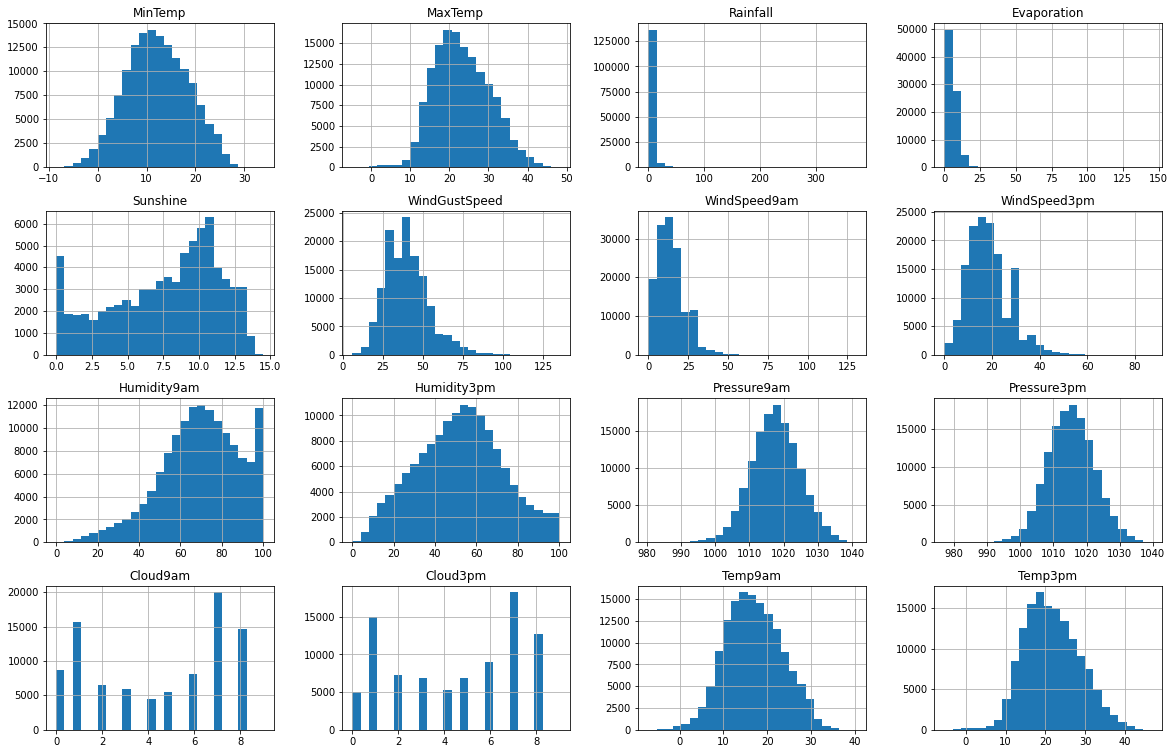

In [6]:
df.hist(bins=25, figsize=(20,13))
plt.show()

Mengecek Nilai skewness

In [7]:
for var in df.select_dtypes(np.number): #Looping semua data dtrain Numerik
    print(var)
    print('Nilai Skew : ', df[var].skew()) #Nilai skewness dari tiap data numerik 
    # print('Nilai Skew % : ',round(df[var].skew() /len(df) *100, 2)) #Nilai skewness(%) dari tiap data numerik 
    print()

MinTemp
Nilai Skew :  0.021188284011150468

MaxTemp
Nilai Skew :  0.22083934813407782

Rainfall
Nilai Skew :  9.83622525039533

Evaporation
Nilai Skew :  3.7612860111420643

Sunshine
Nilai Skew :  -0.4964800381328167

WindGustSpeed
Nilai Skew :  0.8748788780303394

WindSpeed9am
Nilai Skew :  0.7776295122810298

WindSpeed3pm
Nilai Skew :  0.6282154194116664

Humidity9am
Nilai Skew :  -0.48396899459793047

Humidity3pm
Nilai Skew :  0.03361436764166918

Pressure9am
Nilai Skew :  -0.09552363669451734

Pressure3pm
Nilai Skew :  -0.04562140480119886

Cloud9am
Nilai Skew :  -0.229081832248417

Cloud3pm
Nilai Skew :  -0.22638434607149094

Temp9am
Nilai Skew :  0.08853999659506906

Temp3pm
Nilai Skew :  0.2379603639909972



-   Column Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm memiliki distribusi data Skewness +, sedangkan sisanya memiliki distribusi data Gaussian/Normal

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [9]:
df.describe(include='object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


-   Dataset tediri dari 49 lokasi
-   Lokasi Canbera terbanyak dari dataset tersebut
-   RainTomorrow (target) lebih banyak yang tidak hujan ('no')

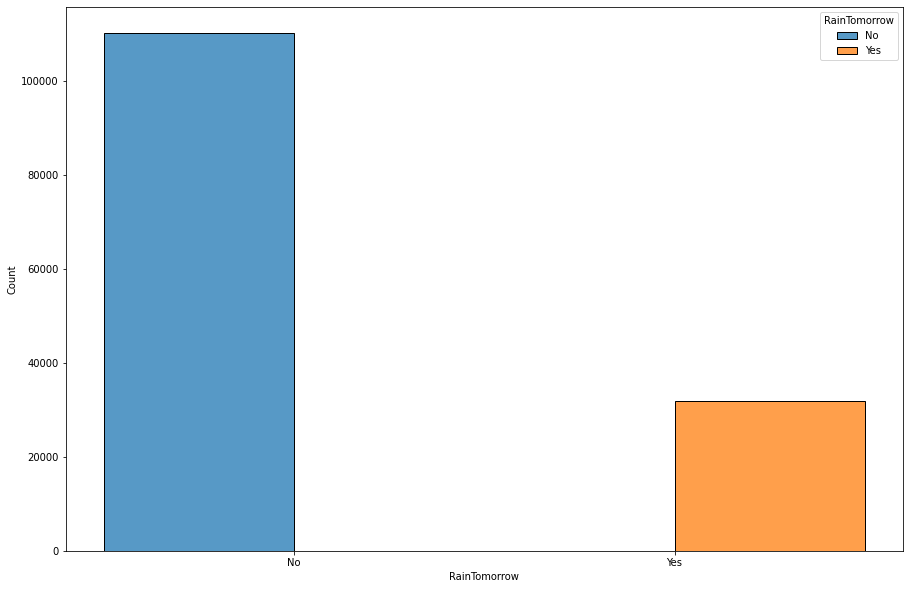

In [10]:
plt.figure(figsize=(15,10))
sns.histplot(df, x=df['RainTomorrow'], hue=df['RainTomorrow'], multiple='dodge')
plt.show()

Dalam dataset ini lebih banyak data yang tidak akan hujan pada keeseokan harinya. 

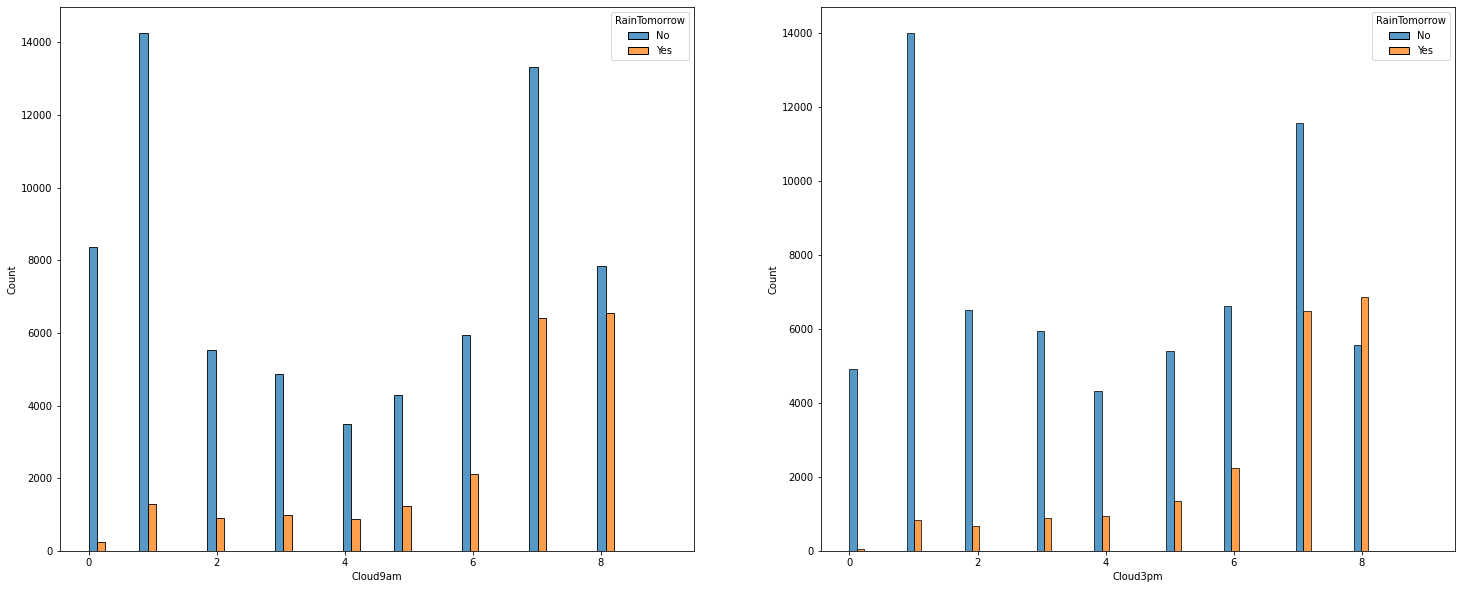

In [11]:
plt.rcParams['figure.figsize'] = (25,10) #Ukuran Plot

#plot 1
plt.subplot(1,2,1)
sns.histplot(data=df, x=df['Cloud9am'],hue=df['RainTomorrow'], multiple='dodge') #Melihat jumlah lxft dan uber

#plot 2
plt.subplot(1,2,2)
sns.histplot(data=df, x=df['Cloud3pm'],hue=df['RainTomorrow'], multiple='dodge') #Melihat Jumlah jenis-jenis kendaraan

plt.show()

- Jika Cloud9am 8 maka besok akan hujan, begitu juga dengan cloud3pm.

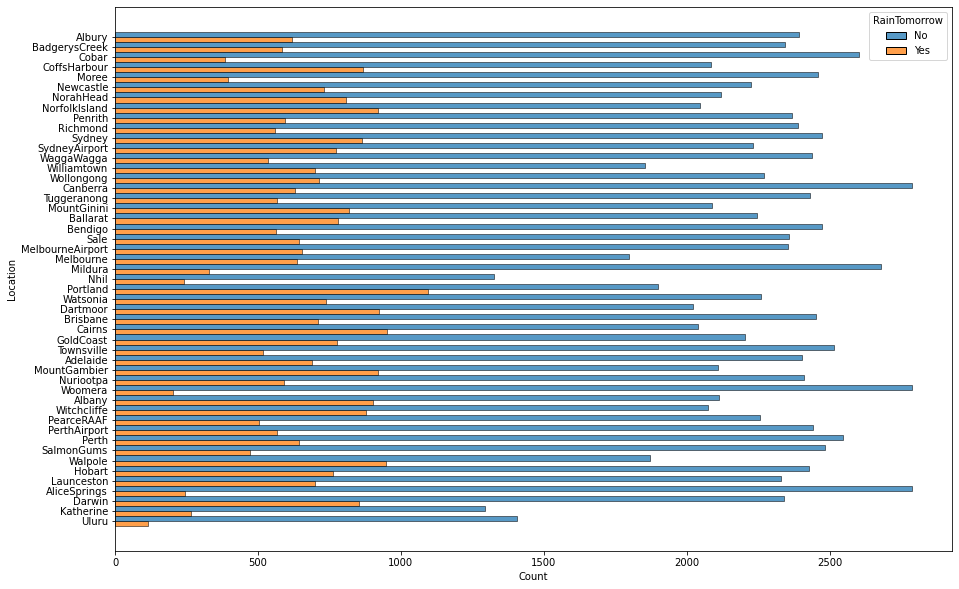

In [12]:
plt.figure(figsize=(15,10))
sns.histplot(df, y=df['Location'], hue=df['RainTomorrow'], multiple='dodge')
plt.show()

-   Dalam dataset ini kota yang paling sering hujan keesokan harinya adalah kota Portland.

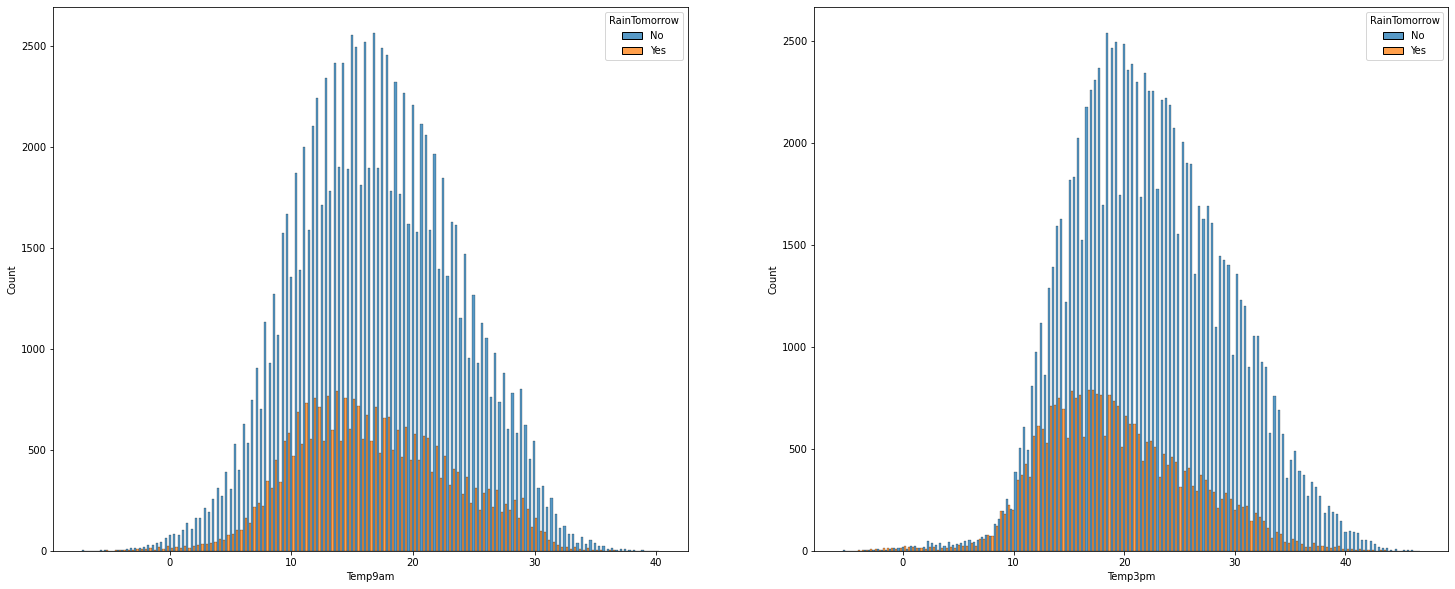

In [13]:
plt.rcParams['figure.figsize'] = (25,10) #Ukuran Plot

#plot 1
plt.subplot(1,2,1)
sns.histplot(data=df, x=df['Temp9am'],hue=df['RainTomorrow'], multiple='dodge') #Melihat jumlah lxft dan uber

#plot 2
plt.subplot(1,2,2)
sns.histplot(data=df, x=df['Temp3pm'],hue=df['RainTomorrow'], multiple='dodge') #Melihat Jumlah jenis-jenis kendaraan

plt.show()

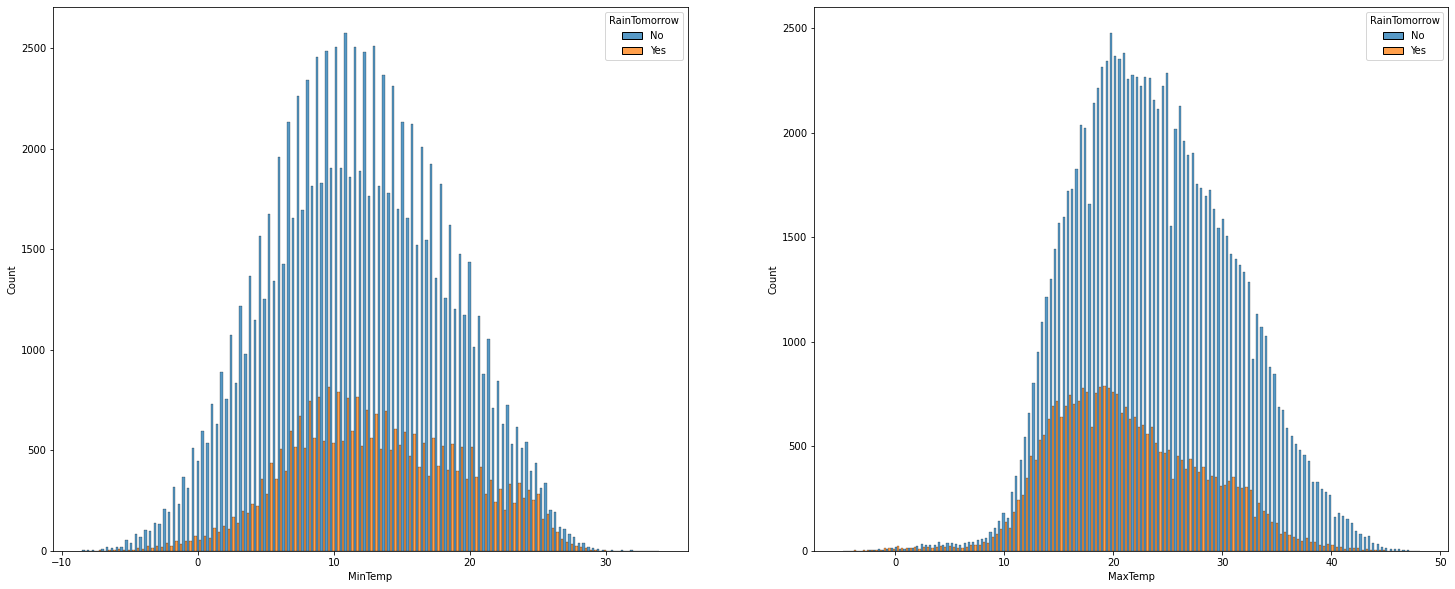

In [14]:
plt.rcParams['figure.figsize'] = (25,10) #Ukuran Plot

#plot 1
plt.subplot(1,2,1)
sns.histplot(data=df, x=df['MinTemp'],hue=df['RainTomorrow'], multiple='dodge') #Melihat jumlah lxft dan uber

#plot 2
plt.subplot(1,2,2)
sns.histplot(data=df, x=df['MaxTemp'],hue=df['RainTomorrow'], multiple='dodge') #Melihat Jumlah jenis-jenis kendaraan

plt.show()

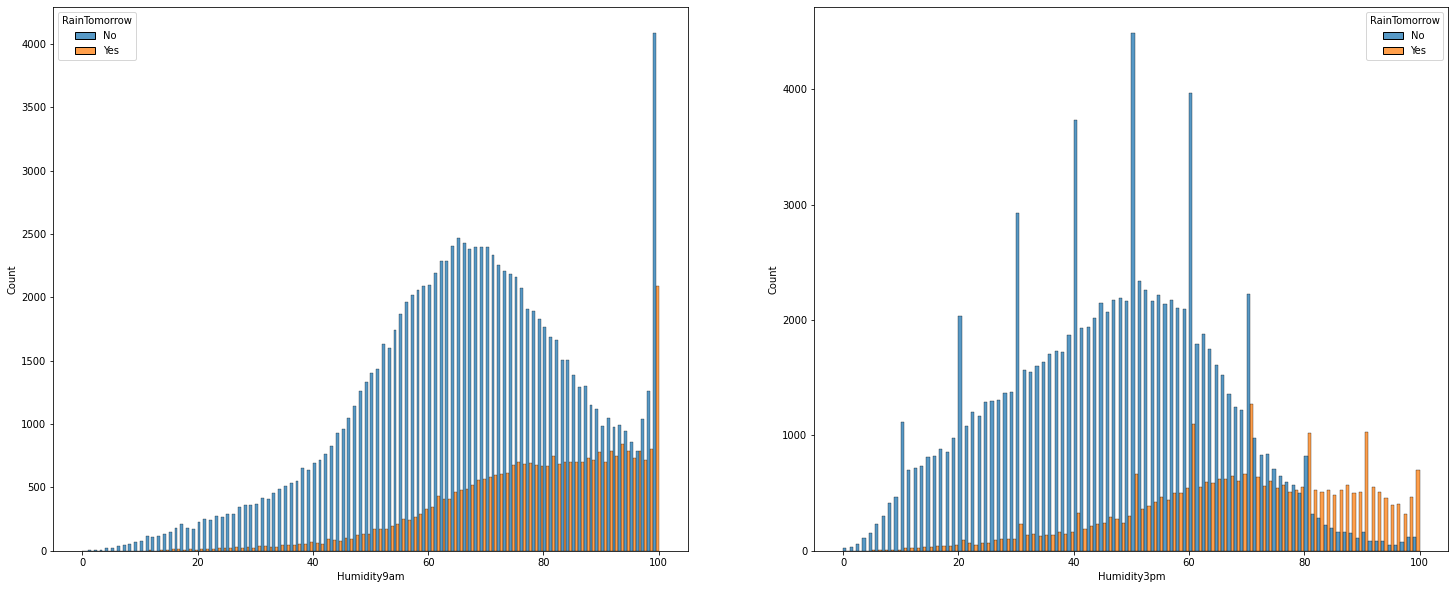

In [15]:
plt.rcParams['figure.figsize'] = (25,10) #Ukuran Plot

#plot 1
plt.subplot(1,2,1)
sns.histplot(data=df, x=df['Humidity9am'],hue=df['RainTomorrow'], multiple='dodge') #Melihat jumlah lxft dan uber

#plot 2
plt.subplot(1,2,2)
sns.histplot(data=df, x=df['Humidity3pm'],hue=df['RainTomorrow'], multiple='dodge') #Melihat Jumlah jenis-jenis kendaraan

plt.show()

# Data Preprocessing

## Get Data Inference

In [16]:
# Membuat Data Inference dari Data yang memiliki Missing Value dalam Target
inf = df[df.RainTomorrow.isnull()] #Memilih Data Missing Value Target
inf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,WNW,4.0,30.0,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
283,2009-09-10,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,WNW,6.0,13.0,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,2010-02-09,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,SW,6.0,11.0,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,2010-02-11,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,E,9.0,7.0,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,2010-02-17,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,SSW,6.0,11.0,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN


In [17]:
# Menghapus data Inference dari dalam dataset
df_train_test = df.drop(inf.index)
df_train_test.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [18]:
# Reset Index untuk Data_train_test dan data for inference
df_train_test.reset_index(drop=True, inplace=True)
inf.reset_index(drop=True, inplace=True)
inf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,WNW,4.0,30.0,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
1,2009-09-10,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,WNW,6.0,13.0,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
2,2010-02-09,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,SW,6.0,11.0,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
3,2010-02-11,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,E,9.0,7.0,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
4,2010-02-17,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,SSW,6.0,11.0,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN


## Feature Selection

Text(0.5, 1.0, 'Heatmap Korelasi')

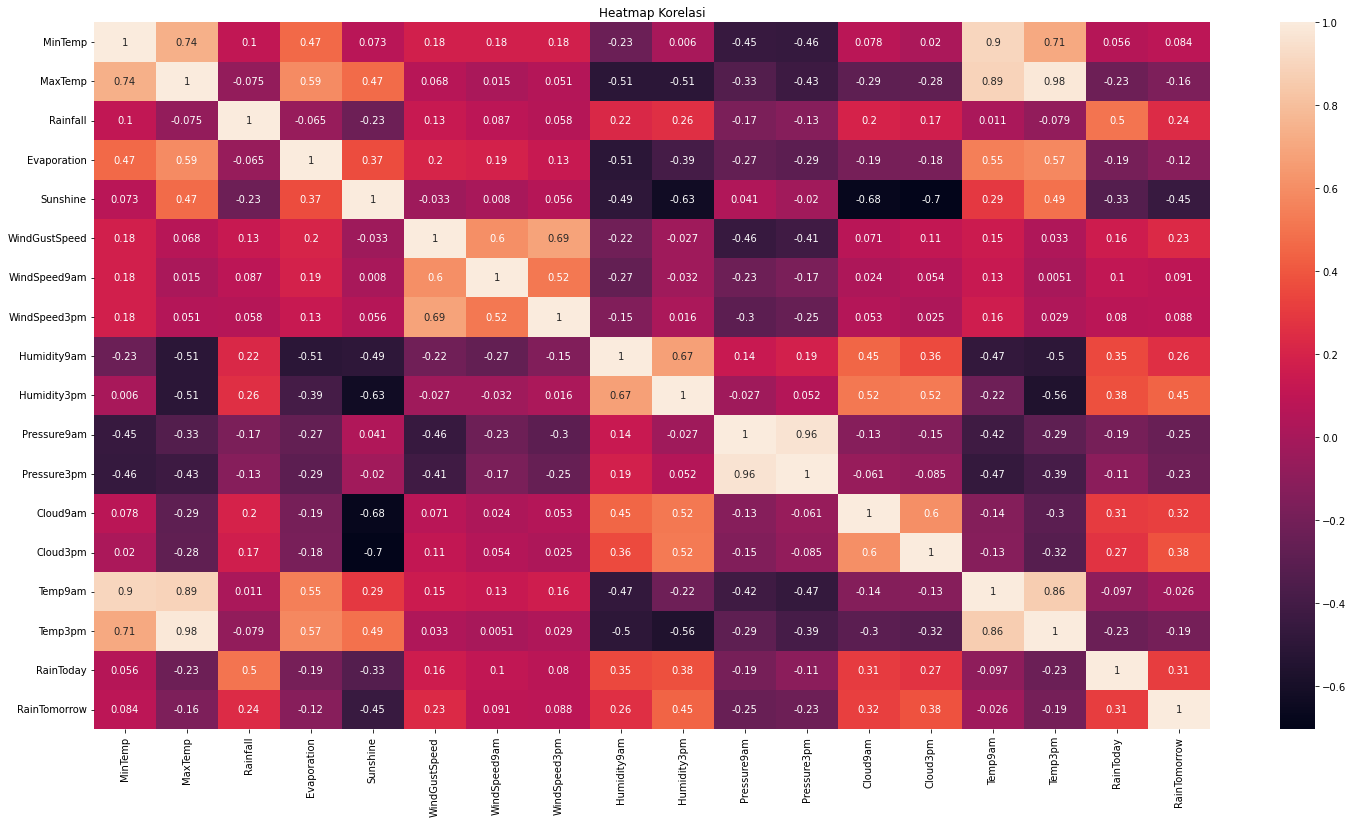

In [19]:
#Membuat Heatmap Korelasi untuk pertimbangan Feature Selection

#df_select dibuat hanya untuk melihat korelasi terhadap target, RainToday dan RainTomorrow akan diencoding di tahap berikutnya.
df_select = df_train_test.copy()
df_select['RainTomorrow'].replace({'No' : 0, 'Yes' : 1},inplace=True)
df_select['RainToday'].replace({'No' : 0, 'Yes' : 1}, inplace=True)

plt.figure(figsize=(25,13)) #Ukuran Plot
sns.heatmap(df_select.corr(), annot=True) #Menampilkan korelasi dari df_select, yang saya fokuskan korelasi terhadap fitur 'Price'
plt.title('Heatmap Korelasi') #Title plot

-   Terdapat High Multi Collinearity antara Temp9am dan Temp3pm, Pressure9am dan Pressure3pm maka akan dilakukan Drop Column.
-   Terdapat Korelasi yang cukup tinggi untuk Target adalah column Humidity3pm, Cloud3pm dan RainToday, sedangkan yang lainnya cukup memiliki korelasi terhadap Target sehingga saya memutuskan untuk tetap menjadikannya sebuah fitur.

Feature selection menghapus column yang memiliki High Multi Collinearity ('Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm')  
Feature selection menghapus column yang memiliki Missing Value Tinggi ('Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm')

In [20]:
# Feature Selection
df_train_test.drop(columns=['Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm','Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

In [21]:
df_train_test.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,No,No


## Train Test Split

In [22]:
# Splitting Dataset menggunakan sklearn train_test_split
# Membagi untuk data train 80% dan test 30%
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_train_test, test_size=0.2, random_state=33)

print(train.shape)
print(test.shape)

(113754, 15)
(28439, 15)


## Handling Outliers

### Identify Outliers

In [23]:
#function histplot dan boxplot untuk melihat distribusi data
def identify_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # Plot 1 Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Plot 2 Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

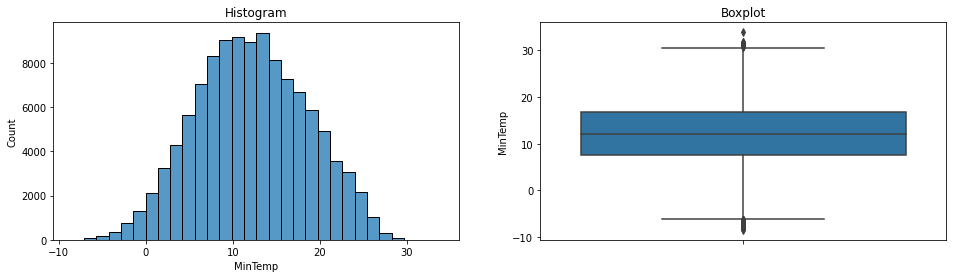

Nilai Skew :  0.023676303605226448



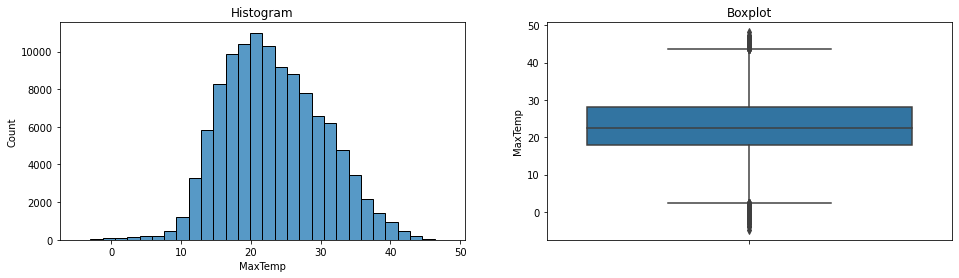

Nilai Skew :  0.22637212577545396



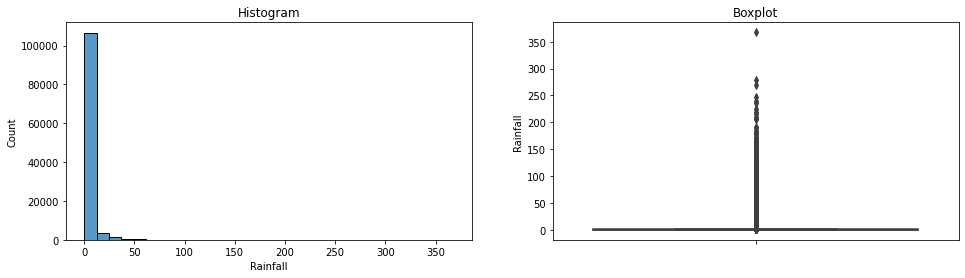

Nilai Skew :  9.674505163600573



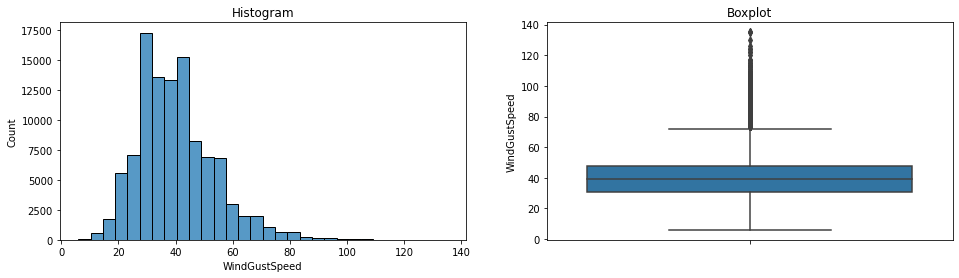

Nilai Skew :  0.8710176797950845



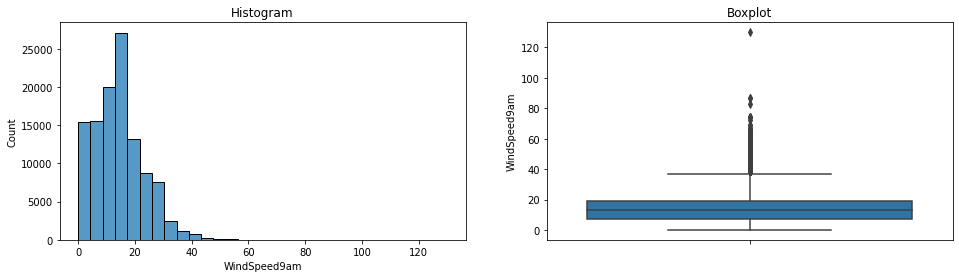

Nilai Skew :  0.777717909865032



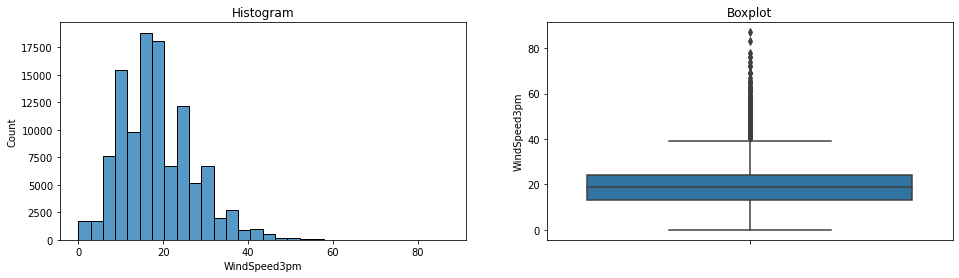

Nilai Skew :  0.6350256075395495



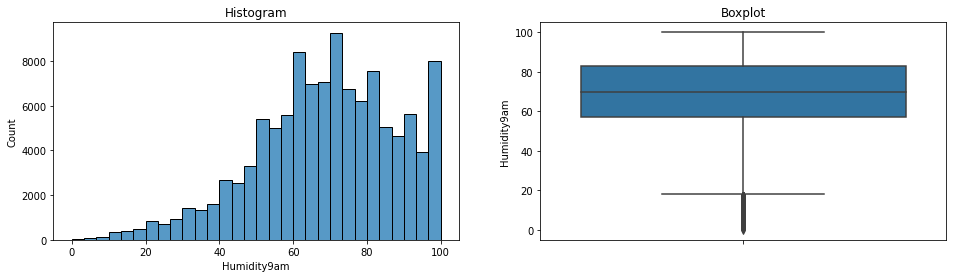

Nilai Skew :  -0.4848843574273096



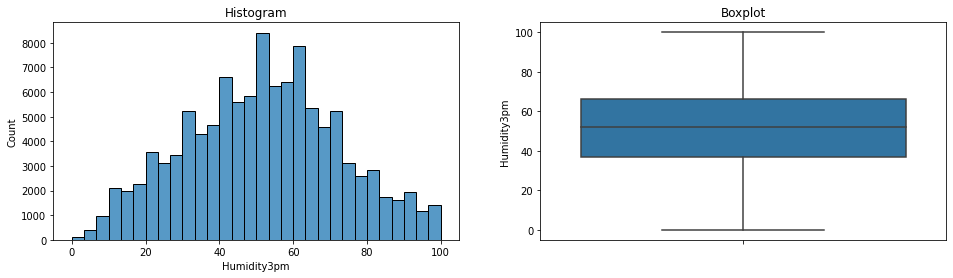

Nilai Skew :  0.029785105154483682



In [24]:
for var in train.select_dtypes(np.number): #Looping semua data dtrain Numerik
    identify_plots(train, var)
    print('Nilai Skew : ', train[var].skew()) #Nilai skewness dari tiap data numerik 
    print()

-   Rainfall, WindGustSpeed, WindSpeed9am, WindSpeed3pm memiliki distribusi data Skewness+ maka akan handling outliers menggunakan IQR batas atas.
-   MinTemp, MaxTemp, Humidity9am, Humidity3pm memiliki distribusi data Gaussian/Normal maka akan handling outliers menggunakan mean +- 3 * standar deviasi.

### Outliers Detection

In [25]:
#Membuat function untuk menemukan batas atas dan batas bawah menggunakan mean +- 3 * standard deviasi.
def find_normal_boundaries(df, variable):
    upper_boundary_normal = df[variable].mean() + 3 * df[variable].std() # batas atas normal
    lower_boundary_normal = df[variable].mean() - 3 * df[variable].std() # batas bawah normal

    return upper_boundary_normal, lower_boundary_normal

In [26]:
#Membuat function untuk menemukan batas atas dan batas bawah menggunakan IQR
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25) #IQR = Q3 - Q1

    lower_boundary_skew = df[variable].quantile(0.25) - (IQR * distance) #batas bawah skew
    upper_boundary_skew = df[variable].quantile(0.75) + (IQR * distance) #batas atas skew

    return upper_boundary_skew, lower_boundary_skew

In [27]:
train.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainTomorrow
115987,2012-08-12,PerthAirport,13.9,18.2,0.0,SW,57.0,N,WNW,17.0,30.0,94.0,84.0,No,Yes
49142,2012-10-29,Tuggeranong,6.1,23.8,0.0,WSW,28.0,SW,WNW,6.0,15.0,75.0,29.0,No,No
141894,2016-08-29,Uluru,14.2,14.4,9.2,WSW,31.0,SW,ESE,24.0,9.0,93.0,100.0,Yes,Yes


#### Outliers Detection for Normal Distribution

MinTemp

In [28]:
# Melihat batas atas dan batas bawah variable MinTemp
MinTemp_upper_boundary_normal, MinTemp_lower_boundary_normal = find_normal_boundaries(train, 'MinTemp')
MinTemp_upper_boundary_normal, MinTemp_lower_boundary_normal

(31.393469840446976, -7.010019201521537)

In [29]:
# Melihat jumlah dan percent data outliers variable MinTemp
print('Jumlah data MinTemp diatas 31.39   : {}'.format(len(train[train['MinTemp'] > MinTemp_upper_boundary_normal])))
print('Jumlah data MinTemp dibawah -7.01   : {}'.format(len(train[train['MinTemp'] < MinTemp_lower_boundary_normal])))
print()
print('% Jumlah data MinTemp diatas 31.39 : {}'.format(len(train[train['MinTemp'] > MinTemp_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data MinTemp dibawah -7.01 : {}'.format(len(train[train['MinTemp'] < MinTemp_lower_boundary_normal])/len(train) * 100))

Jumlah data MinTemp diatas 31.39   : 6
Jumlah data MinTemp dibawah -7.01   : 11

% Jumlah data MinTemp diatas 31.39 : 0.005274539796402764
% Jumlah data MinTemp dibawah -7.01 : 0.009669989626738401


Outliers dari MinTemp adalah 0.01% , maka akan dilakukan Trimming

MaxTemp

In [30]:
# Melihat batas atas dan batas bawah variable MaxTemp
MaxTemp_upper_boundary_normal, MaxTemp_lower_boundary_normal = find_normal_boundaries(train, 'MaxTemp')
MaxTemp_upper_boundary_normal, MaxTemp_lower_boundary_normal

(44.57826632196738, 1.864861051359739)

In [31]:
# Melihat jumlah dan percent data outliers variable MaxTemp
print('Jumlah data MaxTemp diatas 31.39   : {}'.format(len(train[train['MaxTemp'] > MaxTemp_upper_boundary_normal])))
print('Jumlah data MaxTemp dibawah -7.01   : {}'.format(len(train[train['MaxTemp'] < MaxTemp_lower_boundary_normal])))
print()
print('% Jumlah data MaxTemp diatas 31.39 : {}'.format(len(train[train['MaxTemp'] > MaxTemp_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data MaxTemp dibawah -7.01 : {}'.format(len(train[train['MaxTemp'] < MaxTemp_lower_boundary_normal])/len(train) * 100))

Jumlah data MaxTemp diatas 31.39   : 59
Jumlah data MaxTemp dibawah -7.01   : 191

% Jumlah data MaxTemp diatas 31.39 : 0.05186630799796051
% Jumlah data MaxTemp dibawah -7.01 : 0.16790618351882133


Outliers dari MaxTemp adalah 0.21% , maka akan dilakukan Trimming.

Humidity9am

In [32]:
# Melihat batas atas dan batas bawah variable Humidity9am
Humidity9am_upper_boundary_normal, Humidity9am_lower_boundary_normal = find_normal_boundaries(train, 'Humidity9am')
Humidity9am_upper_boundary_normal, Humidity9am_lower_boundary_normal

(126.00891922574581, 11.710084771441025)

In [33]:
# Melihat jumlah dan percent data outliers variable Humidity9am
print('Jumlah data Humidity9am diatas 126.00   : {}'.format(len(train[train['Humidity9am'] > Humidity9am_upper_boundary_normal])))
print('Jumlah data Humidity9am dibawah -11.71   : {}'.format(len(train[train['Humidity9am'] < Humidity9am_lower_boundary_normal])))
print()
print('% Jumlah data Humidity9am diatas 126.00 : {}'.format(len(train[train['Humidity9am'] > Humidity9am_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data Humidity9am dibawah -11.71 : {}'.format(len(train[train['Humidity9am'] < Humidity9am_lower_boundary_normal])/len(train) * 100))

Jumlah data Humidity9am diatas 126.00   : 0
Jumlah data Humidity9am dibawah -11.71   : 366

% Jumlah data Humidity9am diatas 126.00 : 0.0
% Jumlah data Humidity9am dibawah -11.71 : 0.3217469275805686


Outliers dari Humidity9am adalah 0.3%, maka akan dilakukan Trimming.

Humidity3pm

In [34]:
# Melihat batas atas dan batas bawah variable Humidity3pm
Humidity3pm_upper_boundary_normal, Humidity3pm_lower_boundary_normal = find_normal_boundaries(train, 'Humidity3pm')
Humidity3pm_upper_boundary_normal, Humidity3pm_lower_boundary_normal

(113.9439940736689, -10.869838148681758)

In [35]:
# Melihat jumlah dan percent data outliers variable Humidity3pm
print('Jumlah data Humidity3pm diatas 126.00   : {}'.format(len(train[train['Humidity3pm'] > Humidity3pm_upper_boundary_normal])))
print('Jumlah data Humidity3pm dibawah -11.71   : {}'.format(len(train[train['Humidity3pm'] < Humidity3pm_lower_boundary_normal])))
print()
print('% Jumlah data Humidity3pm diatas 126.00 : {}'.format(len(train[train['Humidity3pm'] > Humidity3pm_upper_boundary_normal])/len(train) * 100))
print('% Jumlah data Humidity3pm dibawah -11.71 : {}'.format(len(train[train['Humidity3pm'] < Humidity3pm_lower_boundary_normal])/len(train) * 100))

Jumlah data Humidity3pm diatas 126.00   : 0
Jumlah data Humidity3pm dibawah -11.71   : 0

% Jumlah data Humidity3pm diatas 126.00 : 0.0
% Jumlah data Humidity3pm dibawah -11.71 : 0.0


Tidak terdapat Outliers pada fitur Humidty3pm

#### Outliers Detection for Skewed+ Distribution

Rainfall

In [36]:
# Melihat batas atas dan batas bawah variable Rainfall
Rainfall_upper_boundary_skew, Rainfall_lower_boundary_skew = find_skewed_boundaries(train, 'Rainfall', 1.5)
Rainfall_upper_boundary_skew, Rainfall_lower_boundary_skew

(2.0, -1.2000000000000002)

In [37]:
# Melihat jumlah dan percent data outliers variable Rainfall
print('Jumlah data Rainfall diatas 2.0   : {}'.format(len(train[train['Rainfall'] > Rainfall_upper_boundary_skew])))
print('% Jumlah data Rainfall diatas 2.0 : {}'.format(len(train[train['Rainfall'] > Rainfall_upper_boundary_skew])/len(train) * 100))

Jumlah data Rainfall diatas 2.0   : 20295
% Jumlah data Rainfall diatas 2.0 : 17.84113086133235


Outliers Rainfall adalah 17% maka akan dibiarkan tidak perlu dilakukan Handling Outliers

WindGustSpeed

In [38]:
# Melihat batas atas dan batas bawah variable WindGustSpeed
WindGustSpeed_upper_boundary_skew, WindGustSpeed_lower_boundary_skew = find_skewed_boundaries(train, 'WindGustSpeed', 1.5)
WindGustSpeed_upper_boundary_skew, WindGustSpeed_lower_boundary_skew

(73.5, 5.5)

In [39]:
# Melihat jumlah dan percent data outliers variable WindGustSpeed
print('Jumlah data WindGustSpeed diatas 73.5   : {}'.format(len(train[train['WindGustSpeed'] > WindGustSpeed_upper_boundary_skew])))
print('% Jumlah data WindGustSpeed diatas 73.5 : {}'.format(len(train[train['WindGustSpeed'] > WindGustSpeed_upper_boundary_skew])/len(train) * 100))

Jumlah data WindGustSpeed diatas 73.5   : 2391
% Jumlah data WindGustSpeed diatas 73.5 : 2.1019041088665014


Outliers WindGustSpeed adalah 2% maka akan dilakukan Trimming.

WindSpeed9am

In [40]:
# Melihat batas atas dan batas bawah variable WindSpeed9am
WindSpeed9am_upper_boundary_skew, WindSpeed9am_lower_boundary_skew = find_skewed_boundaries(train, 'WindSpeed9am', 1.5)
WindSpeed9am_upper_boundary_skew, WindSpeed9am_lower_boundary_skew

(37.0, -11.0)

In [41]:
# Melihat jumlah dan percent data outliers variable WindSpeed9am
print('Jumlah data WindSpeed9am diatas 73.5   : {}'.format(len(train[train['WindSpeed9am'] > WindSpeed9am_upper_boundary_skew])))
print('% Jumlah data WindSpeed9am diatas 73.5 : {}'.format(len(train[train['WindSpeed9am'] > WindSpeed9am_upper_boundary_skew])/len(train) * 100))

Jumlah data WindSpeed9am diatas 73.5   : 1376
% Jumlah data WindSpeed9am diatas 73.5 : 1.2096277933083672


Outliers WindSpeed9am adalah 1.2% maka akan dilakukan Trimming.

WindSpeed3pm

In [42]:
# Melihat batas atas dan batas bawah variable WindSpeed3pm
WindSpeed3pm_upper_boundary_skew, WindSpeed3pm_lower_boundary_skew = find_skewed_boundaries(train, 'WindSpeed3pm', 1.5)
WindSpeed3pm_upper_boundary_skew, WindSpeed3pm_lower_boundary_skew

(40.5, -3.5)

In [43]:
# Melihat jumlah dan percent data outliers variable WindSpeed3pm
print('Jumlah data WindSpeed3pm diatas 73.5   : {}'.format(len(train[train['WindSpeed3pm'] > WindSpeed3pm_upper_boundary_skew])))
print('% Jumlah data WindSpeed3pm diatas 73.5 : {}'.format(len(train[train['WindSpeed3pm'] > WindSpeed3pm_upper_boundary_skew])/len(train) * 100))

Jumlah data WindSpeed3pm diatas 73.5   : 1978
% Jumlah data WindSpeed3pm diatas 73.5 : 1.7388399528807779


Outliers WindSpeed3pm adalah 1.7% maka akan dilakukan Trimming.

Kesimpulan Outliers Detection  
-   MinTemp 0.01% , MaxTemp 0.21%, Humidity9am 0.3%, WindGustSpeed 2%, WindSpeed9am 0.3%, WindSpeed3pm 1.7%, maka akan dilakukan Trimming
-   Rainfall 17% maka akan dibiarkan
-   Humidity3pm tidak memiliki Outliers

### Trimming 

In [44]:
#Normal
# Menandai Outliers di variable 'MinTemp'
outliers_MinTemp = np.where(train['MinTemp'] > MinTemp_upper_boundary_normal, True,
                       np.where(train['MinTemp'] < MinTemp_lower_boundary_normal, True, False))

# Menandai Outliers di variable 'MaxTemp'
outliers_MaxTemp = np.where(train['MaxTemp'] > MaxTemp_upper_boundary_normal, True,
                       np.where(train['MaxTemp'] < MaxTemp_lower_boundary_normal, True, False))

# Menandai Outliers di variable 'Humidity9am'
outliers_Humidity9am = np.where(train['Humidity9am'] > Humidity9am_upper_boundary_normal, True,
                       np.where(train['Humidity9am'] < Humidity9am_lower_boundary_normal, True, False))

#Skew
# Menandai Outliers di variable 'WindGustSpeed'
outliers_WindGustSpeed = np.where(train['WindGustSpeed'] > WindGustSpeed_upper_boundary_skew, True,
                       np.where(train['WindGustSpeed'] < WindGustSpeed_lower_boundary_skew, True, False))

# Menandai Outliers di variable 'WindSpeed9am'
outliers_WindSpeed9am = np.where(train['WindSpeed9am'] > WindSpeed9am_upper_boundary_skew, True,
                       np.where(train['WindSpeed9am'] < WindSpeed9am_lower_boundary_skew, True, False))

# Menandai Outliers di variable 'WindSpeed3pm'
outliers_WindSpeed3pm = np.where(train['WindSpeed3pm'] > WindSpeed3pm_upper_boundary_skew, True,
                       np.where(train['WindSpeed3pm'] < WindSpeed3pm_lower_boundary_skew, True, False))


print(outliers_MinTemp[:10])

[False False False False False False False False False False]


In [45]:
#Menghapus Outliers
train_trimmed = train.loc[~(outliers_MinTemp + outliers_MaxTemp + outliers_Humidity9am + outliers_WindGustSpeed + outliers_WindSpeed9am + outliers_WindSpeed3pm)] 

#Melihat Jumlah Data sebelum dan sesudah dilakukan Trimming
print('Data Train - Before trimming : ', train.shape) 
print('Data Train - After trimming  : ', train_trimmed.shape)

Data Train - Before trimming :  (113754, 15)
Data Train - After trimming  :  (108909, 15)


#### Cek setelah dilakukan Trimming

MinTemp - Before Trimming


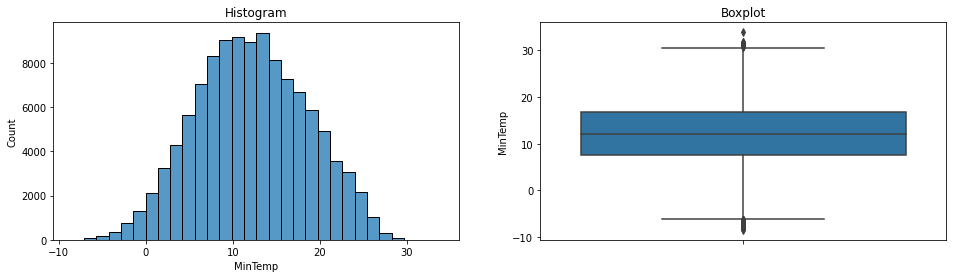


MinTemp - After Trimming


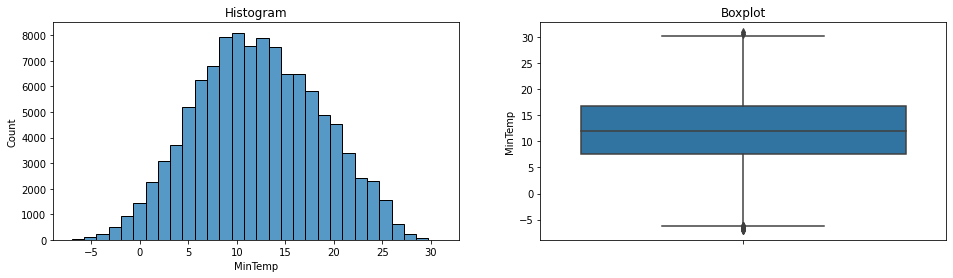

WindGustSpeed - Before Trimming


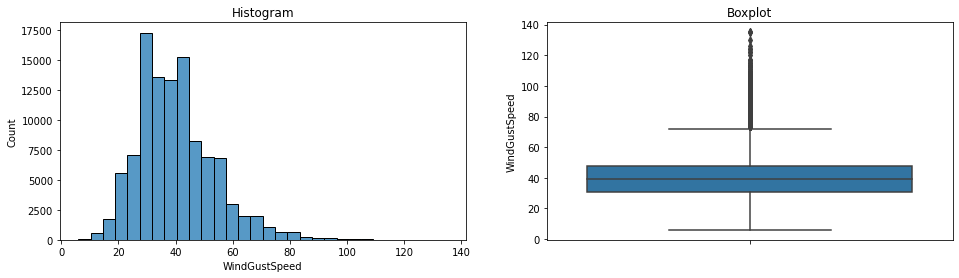


WindGustSpeed - After Trimming


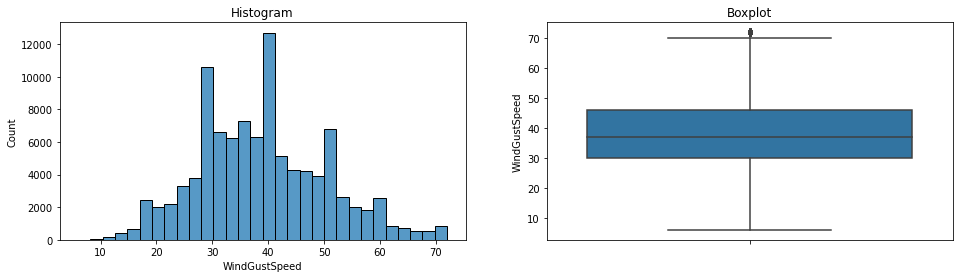

In [46]:
# Cek Sebelum Trimmed dan setelah Trimmed `MinTemp` dan `WindGustSpeed'

#Normal
print('MinTemp - Before Trimming')
identify_plots(train, 'MinTemp')
print('\nMinTemp - After Trimming')
identify_plots(train_trimmed, 'MinTemp')

#Skewness
print('WindGustSpeed - Before Trimming')
identify_plots(train, 'WindGustSpeed')
print('\nWindGustSpeed - After Trimming')
identify_plots(train_trimmed, 'WindGustSpeed')

In [47]:
#cek outliers setelah dilakukan trimming

# Melihat jumlah dan percent data outliers variable MinTemp setelah dilakukan trimming
print('Jumlah data MinTemp diatas 31.39   : {}'.format(len(train_trimmed[train_trimmed['MinTemp'] > MinTemp_upper_boundary_normal])))
print('Jumlah data MinTemp dibawah -7.01   : {}'.format(len(train_trimmed[train_trimmed['MinTemp'] < MinTemp_lower_boundary_normal])))
print('% Jumlah data MinTemp diatas 31.39 : {}'.format(len(train_trimmed[train_trimmed['MinTemp'] > MinTemp_upper_boundary_normal])/len(train_trimmed) * 100))
print('% Jumlah data MinTemp dibawah -7.01 : {}'.format(len(train_trimmed[train_trimmed['MinTemp'] < MinTemp_lower_boundary_normal])/len(train_trimmed) * 100))
print()
# Melihat jumlah dan percent data outliers variable WindGustSpeed setelah dilakukan trimming
print('Jumlah data WindGustSpeed diatas 73.5   : {}'.format(len(train_trimmed[train_trimmed['WindGustSpeed'] > WindGustSpeed_upper_boundary_skew])))
print('% Jumlah data WindGustSpeed diatas 73.5 : {}'.format(len(train_trimmed[train_trimmed['WindGustSpeed'] > WindGustSpeed_upper_boundary_skew])/len(train_trimmed) * 100))

Jumlah data MinTemp diatas 31.39   : 0
Jumlah data MinTemp dibawah -7.01   : 0
% Jumlah data MinTemp diatas 31.39 : 0.0
% Jumlah data MinTemp dibawah -7.01 : 0.0

Jumlah data WindGustSpeed diatas 73.5   : 0
% Jumlah data WindGustSpeed diatas 73.5 : 0.0


Dapat dilihat bahwa sudah tidak ada Outliers, artinya handling outliers telah berhasil.

## Pipeline for Handling Missing Value, Handling Scalling, Handling Encoding

In [48]:
# Mendefinikan Target

# untuk Train data
X_train = train_trimmed.drop(columns=['RainTomorrow']) #Fitur
y_train = train_trimmed['RainTomorrow'].replace({'No' : 0, 'Yes' : 1}) #Target

# untuk Test data
X_test = test.drop(columns=['RainTomorrow']) #Fitur
y_test = test['RainTomorrow'].replace({'No' : 0, 'Yes' : 1}) #Target


In [49]:
y_train

115987    1
49142     0
141894    1
49294     0
33451     0
         ..
34812     1
34877     0
75971     0
131650    0
104152    0
Name: RainTomorrow, Length: 113754, dtype: int64

In [50]:
X_train.shape

(113754, 14)

In [52]:
# Membuat Numerical dan Categorical Columns

num_col = X_train.select_dtypes(include=np.number).columns.tolist() 
cat_col = X_train[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']].columns.tolist()
# cat_col = X_train.select_dtypes(include='object').columns.tolist()
# date_col = X_train['Date'].columns.tolist()
# date_col
cat_col, num_col

(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'],
 ['MinTemp',
  'MaxTemp',
  'Rainfall',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm'])

In [54]:
# Pipeline untuk tipe data Numeric lalu dilakukan scalling
numeric_prep = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())]
)

# Pipeline untuk tipe data categorical lalu dilakukan Encoding
Categorical_prep = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='most_frequent')),
            ('encode', OneHotEncoder())]
)

In [55]:
#Membuat Pipeline Preprocessing gabungan antara pipeline numerical dan categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_prep, num_col ),
        ('cat', Categorical_prep, cat_col)
    ]
)

In [56]:
preprocessor.fit(X_train)


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MinTemp', 'MaxTemp', 'Rainfall',
                                  'WindGustSpeed', 'WindSpeed9am',
                                  'WindSpeed3pm', 'Humidity9am',
                                  'Humidity3pm']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', OneHotEncoder())]),
                                 ['Location', 'WindGustDir', 'WindDir9am',
                                  'WindDir3pm', 'RainToday'])])

In [57]:
preprocessor.transform(X_test)

<28439x107 sparse matrix of type '<class 'numpy.float64'>'
	with 369707 stored elements in Compressed Sparse Row format>

# Model Definition

In [58]:
#Membuat Model Logistic Regression
# Model Logistic Regression dan pipeline preprocessing dimasukan kedalam satu Pipeline model
pipe_logreg = Pipeline([
    ('prep', preprocessor),
    ('logreg', LogisticRegression())
])



In [59]:
pipe_logreg.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am',
                                                   'Humidity3pm']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                 

In [60]:
#Membuat Model SVM
# Model SVM dan pipeline preprocessing dimasukan kedalam satu Pipeline model
pipe_svm = Pipeline([
    ('prep', preprocessor),
    ('svm', SVC())
])

# Model Evaluation

In [61]:
MLA = [pipe_logreg, pipe_svm]

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [63]:
# Predict & Evaluation score
name = []
train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1score = []
test_score = []
for alg in MLA:
    name.append(alg)
    alg.fit(X_train, y_train)
    y_pred_train = alg.predict(X_train)
    y_pred_test = alg.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))
    precision.append(precision_score(y_test, y_pred_test))
    recall.append(recall_score(y_test, y_pred_test))
    f1score.append(f1_score(y_test, y_pred_test))

compare = pd.DataFrame({'Name': name, 'Train Acuuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precission Score': precision, 'Recall Score': recall, 'F1 Score': f1score})

In [64]:
compare

,Name,Train Acuuracy,Test Accuracy,Precission Score,Recall Score,F1 Score,Test Score
0,"(ColumnTransformer(transformers=[('num',\n ...",0.843724,0.842786,0.731636,0.469590,0.572030,0.842786
1,"(ColumnTransformer(transformers=[('num',\n ...",0.867266,0.853124,0.796527,0.461418,0.584337,0.853124


indeks 0 = Model Logistic Regression  
indeks 1 = Model Support Vector Machine Classifier  
Salah code pada name, tetapi saya yakin dengan urutannya karna menggunakan for loop dia akan looping satu-satu berdasarkan urutan, jika saya ulang code name terlalu lama komputasi svm-nya.

Dari hasil Evaluation Model tersebut, bahwa SVM memiliki accuracy test 0.85 yang lebih tinggi daripada Logistic Regression 0.84 perbedaan yang tidak signifikan, oleh karena itu saya akan memilih model Logistic Regression karena komputasi SVM terlalu lama bisa mencapai 30 menit untuk sekali komputasi sedangkan Logistic Regression hanya 2 menit. 

## Cross Validation Score

In [65]:
cv_result = cross_val_score(pipe_logreg, X_test, y_test, scoring='accuracy', cv=10)
cv_result.mean()

0.8417664997998886

Hasil dari Cross Validation adalah 0.84 berarti Accuracy score sudah tepat.

# Hyperparameter Tuning

In [66]:
#Membuat list parameter-parameter yang akan di gridsearch atau mencari best parameter
param_grid = [
    {'logreg__penalty' : ['l2','none'],
    'logreg__C' : np.logspace(-4, 4, 10),
    'logreg__solver' : ['liblinear','saga'],
    'logreg__max_iter' : [100, 1000]}]

In [68]:
#Melakukan Gridsearch atau pencarian best parameter terhadap model logistic regression
clf = GridSearchCV(pipe_logreg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [69]:
# Train Gridsearch atau pencarian best parameter terhadap dataset ini.
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


In [70]:
#melihat best parameter
best_clf.best_params_

{'logreg__C': 0.0001,
 'logreg__max_iter': 1000,
 'logreg__penalty': 'none',
 'logreg__solver': 'saga'}

In [71]:
#melihat best score 
best_clf.best_score_

0.8432582590502312

In [72]:
#membuat model dengan best estimatornya
best_logreg = best_clf.best_estimator_

In [73]:
#membandingkan evaluation model dari model best parameter dengan base model
ML = [pipe_logreg, best_logreg]

# Predict & Evaluation score
name = []
train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1score = []
test_score = []
for alg in ML:
    name.append(alg)
    alg.fit(X_train, y_train)
    y_pred_train = alg.predict(X_train)
    y_pred_test = alg.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))
    precision.append(precision_score(y_test, y_pred_test))
    recall.append(recall_score(y_test, y_pred_test))
    f1score.append(f1_score(y_test, y_pred_test))
    test_score.append(alg.score(X_test, y_test))

compare = pd.DataFrame({'Name': name, 'Train Acuuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precission Score': precision, 'Recall Score': recall, 'F1 Score': f1score, 'Test Score': test_score})

In [74]:
compare

,Name,Train Acuuracy,Test Accuracy,Precission Score,Recall Score,F1 Score,Test Score
0,"(ColumnTransformer(transformers=[('num',\n ...",0.843724,0.842786,0.731636,0.469590,0.572030,0.842786
1,"(ColumnTransformer(transformers=[('num',\n ...",0.843777,0.842786,0.731976,0.469118,0.571784,0.842786


Setelah menggunakan Best Parameter untuk model Logistic Regression, hasilnya tidak ada perbedaan signifikan.

# Model Inference

Prediksi dari data inference yang diambil dari dataset

In [75]:
y_pred_inf = best_logreg.predict(inf)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Prediction'])
y_pred_inf.head(20)

,Prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


Prediksi untuk menjawab kasus Doni.

In [76]:
#Membuat Dictionary yang akan dijadikan dataframe berdasarkan kasus Doni.
cuaca_hari_ini = [{
    'Date': '2022-02-13',
    'Location': 'NorfolkIsland',
    'MinTemp' : 15.9,
    'MaxTemp' : 21.9,
    'Rainfall' : 0.6,
    'Evaporation' : 4.6,
    'WindGustDir' : 'W',
    'WindGustSpeed' : 54.0,
    'WindDir9am': 'W',
    'WindDir3pm' : 'WNW',
    'WindSpeed9am': 24.0,
    'WindSpeed3pm': 22.0,
    'distance': 3.4,
    'Humidity9am': 61.0,
    'Humidity3pm': 75.0,
    'Pressure9am': 1013.6,
    'Pressure3pm': 1010.4,
    'Cloud9am': np.nan,
    'Cloud3pm': 8.0,
    'Temp9am': 20.9,
    'Temp3pm': 20.3,
    'RainToday': 'No',
}]

In [77]:
#Kasus doni dijadikan sebuah dataframe
cuaca_hari_ini = pd.DataFrame(cuaca_hari_ini)
cuaca_hari_ini

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,distance,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2022-02-13,NorfolkIsland,15.9,21.9,0.6,4.6,W,54.0,W,WNW,24.0,22.0,3.4,61.0,75.0,1013.6,1010.4,NaN,8.0,20.9,20.3,No


In [78]:
#prediksi kasus Doni
y_pred_besok = best_logreg.predict(cuaca_hari_ini)
#Jadikan sebuah dataframe
y_pred_besok = pd.DataFrame(y_pred_besok, columns=['Prediction'])

#Jika hasil prediksi 0 maka besok tidak akan hujan
y_pred_besok.loc[y_pred_besok['Prediction'] == 0, 'Keputusan Doni'] = 'Pakai Motor' 
#Jika hasil prediksi 1 maka besok harus membawa payung
y_pred_besok.loc[y_pred_besok['Prediction'] != 0, 'Keputusan Doni'] = 'Sewa Mobil'  
 
y_pred_besok


,Prediction,Keputusan Doni
0,1,Sewa Mobil


Untuk menjawab kasus doni diatas, maka Doni harus segera memesan sewa mobil dari sekarang untuk bepergian besok.

# Conclussion

-   Model
    -   Setelah melakukan perbandingan base model antara Logistic Regression dengan Support Vector Machine, Support Vector Machine memiliki accuracy lebih tinggi dari Logistic Regression namun hanya memiliki perbedaan yang sedikit. Oleh karena itu, saya lebih memilih Logistic Regression karna Support Vector Machine komputasinya sangat lama bisa mencapai 30 menit sedangkan Logistic Regression hanya 2 menit dan memiliki accuracy lebih kecil sedikit dari Support Vector Machine.
    -   Setelah mendapat base model terbaik, saya lakukan hyperparameter tuning dari base model terbaik tersebut, namun hasil accuracy setalah menggunakan best parameter tidak berpengaruh signifikan.  
    -   Model yang saya buat hanya memiliki accuracy 0.84, model cukup baik untuk kasus ini, namun harus dioptimisasi lagi agar memiliki accuracy lebih baik.  

-   Problem
    -   Suatu hari Doni berencana berkencan dengan pacarnya besok pada tanggal 14-Februari-2022. Doni berencana berkencan menggunakan motor tetapi doni ragu apakah besok akan turun hujan, jika besok turun hujan doni harus booking sewa mobil pada hari ini. Oleh karena itu, doni meminta tolong saya untuk memprediksi apakah besok akan turun hujan atau tidak.
-   Objective
    -   Saya akan memprediksi masalah doni menggunakan machine learning classification model SVM atau Logistic Regression, dengan mempelajari pola Cuaca Hujan disana menggunakan dataset weather-rain-AUS.
-   Objective Result
    -   Doni harus segera booking sewa mobil untuk bepergian besok, karena prediksi dari model yang saya buat besok akan turun hujan.